<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/C%C3%B3pia_de_Ricardo_Roberto_Convolucional_Network_Autoencoder_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

**GPU necessária**

In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0

     |████████████████████████████████| 332.1MB 51kB/s 
     |████████████████████████████████| 419kB 57.8MB/s 
     |████████████████████████████████| 3.0MB 52.5MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

%matplotlib inline

# Data Loading

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255
x_test = np.expand_dims(x_test, axis=-1) / 255

x_train = np.where(x_train > 0.5, 1, 0)
x_test = np.where(x_test > 0.5, 1, 0)

print(x_train.shape, x_train.dtype)
print(x_test.shape, x_test.dtype)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) int64
(10000, 28, 28, 1) int64


# Autoencoder

In [ ]:
model = Sequential()

#encoder
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1 )))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

#decoder
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='sigmoid'))
          
model.summary()
          
model.compile(optimizer='adam', loss='binary_crossentropy')

hist = model.fit(x_train, x_train, batch_size=128, epochs=8, validation_data=(x_train, x_train))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        4

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


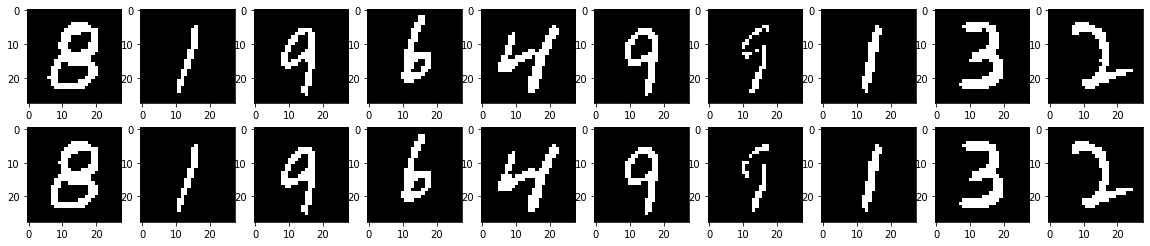

In [ ]:
n_imgs = 10

random_idxs = np.random.choice(range(x_test.shape[0]), size=n_imgs)
im_ori = x_test[random_idxs]
im_dec = model.predict_classes(im_ori)

plt.figure(figsize=(20, 4))
for i in range(n_imgs):
    plt.subplot(2, n_imgs, i + 1)
    plt.imshow(im_ori[i].reshape(28, 28), cmap='gray')
    
    plt.subplot(2, n_imgs, i + 1 + n_imgs)
    plt.imshow(im_dec[i].reshape(28, 28), cmap='gray')